## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo(E).
> Debe describir el trabajo.

### 1.2 Objetivos(E).
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser **concretos, evaluables y verificables.**
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


### 1.3 Definición del problema.(G)
> Después del 2008 el mundo se dio cuenta que los mercados financieros son muy volátiles y son controlados por capitales que en su mayoría se encuentran fuera del alcance de la mayoría de las personas. Después de este suceso se empezó a migrar a nuevas técnicas de hacer que el dinero crezca a base de una inversión. El mercado de las apuestas deportivas es un área de oportunidad que muy pocos ven por su nivel de riesgo, ya que tiene una particularidad, se gana muy bien pero también se puede perder todo el capital invertido en un abrir y cerrar de ojos. 

>En este proyecto trataremos de modelar situaciones deportivas como el campeonato inglés el cual está catalogado como el más competitivo y por ende más diversificado en los momios deportivos. En la mayoría de los casos las personas pierden su dinero porque apuestan por sentimiento sin analizar ningún dato. Este proyecto se basaría en datos históricos como los momios deportivos.

>Ya con los momios calcularíamos la probabilidad de que el equipo seleccionado gane el partido en base a él momio. Mediante el uso de una distribución, la cual decidiremos cual usar dependiendo de los datos, podremos simular el ganador de un partido, este proceso lo podríamos repetir con cualquier equipo y poder usarlo para otras apuestas. Y así poder diversificar el portafolio de apuestas. 


### 1.4 Nodos y variables que se decidieron simular y porqué(E)
> En este apartado el objetivo es identificar los problemas que se van a abordar, para examinar la factibilidad y viabilidad de la simulación de los nodos escogidos. Posteriormente se debe de argumentar del porqué de los nodos escogidos.



### 1.5 Definición de hipótesis y supuestos.(G)
>  Para poder modelar un proceso de negocio o cualquiera otro proceso en el área de las ingenierías o ciencias sociales, después de identificar el objeto de estudio, es importante indicar cuales son los supuestos que se dan por verdaderos a lo largo de la ejecución del proceso. Estos supuestos se deben indicar en forma de variables e hipótesis (son diferentes), porque si puedes definir en un valor el supuesto lo llamaremos "supuesto constante" y si no es posible identificarlo con un número entonces será una hipótesis que afectará la construcción de los escenarios posibles del proceso.

### 1.6 Obtención de bases de datos(E)
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy import optimize

In [3]:

data2021=pd.read_csv('E0.csv')
data2021.set_index('Date',inplace=True)
data1920=pd.read_csv('E0 (4).csv')
data1920.set_index('Date',inplace=True)
data1819=pd.read_csv('E0 (3).csv')
data1819.set_index('Date',inplace=True)
data1718=pd.read_csv('E0 (2).csv')
data1718.set_index('Date',inplace=True)
data1617=pd.read_csv('E0 (1).csv')
data1617.set_index('Date',inplace=True)
data = data1617.append(data1718).append(data1819)
data2 = data1920.append(data2021)
data

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
Date,,,,,,,,,,,,,,,,,,,,,
13/08/16,E0,Burnley,Swansea,0,1,A,0,0,D,J Moss,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
13/08/16,E0,Crystal Palace,West Brom,0,1,A,0,0,D,C Pawson,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
13/08/16,E0,Everton,Tottenham,1,1,D,1,0,H,M Atkinson,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
13/08/16,E0,Hull,Leicester,2,1,H,1,0,H,M Dean,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
13/08/16,E0,Man City,Sunderland,2,1,H,1,0,H,R Madley,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/05/2019,E0,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,...,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
12/05/2019,E0,Man United,Cardiff,0,2,A,0,1,A,J Moss,...,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
12/05/2019,E0,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,...,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49


In [82]:
cheh = data[data['HomeTeam'] == 'Chelsea' ]
cheh1 = data2[data2['HomeTeam'] == 'Chelsea' ]
cheh = cheh.append(cheh1)
chea = data[data['AwayTeam'] == 'Chelsea' ]#primer nodo

Mch = data[data['HomeTeam'] == 'Manchester City' ]
Mca = data[data['AwayTeam'] == 'Manchester City' ]#segundo nodo

Muh = data[data['HomeTeam'] == 'Manchester United' ]
Mua = data[data['AwayTeam'] == 'Manchester United' ]#Tercer nodo

livh = data[data['HomeTeam'] == 'Liverpool' ]
liva = data[data['AwayTeam'] == 'Liverpool' ]#Cuarto nodo
cheh['B365H']

Date
15/08/16      1.65
27/08/16      1.25
16/09/16      2.25
15/10/16      1.57
23/10/16      2.15
              ... 
27/01/2021    1.60
31/01/2021    1.33
15/02/2021    1.22
28/02/2021    2.15
08/03/2021    1.53
Name: B365H, Length: 90, dtype: float64

90

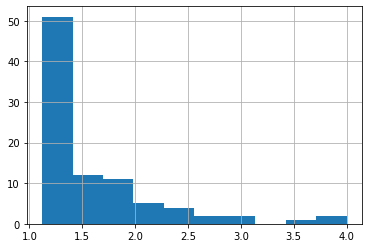

In [83]:
cheh['B365H'].hist()
len(cheh['B365H'])

In [4]:
data = chea['B365A']
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

#    DISTRIBUTIONS = [st.alpha, st.beta, st.chi,st.chi2, st.gamma, st.norm, st.logistic,st.loggamma,
#                    st.loglaplace,st.lognorm, st.t, st.triang]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Chelsea at Home BET365 Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Chelsea at Home BET365 Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

NameError: name 'chea' is not defined